# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [322]:
# Check for GPU
!nvidia-smi

Fri May 30 21:51:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.24                 Driver Version: 566.24         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8              1W /   65W |     151MiB /   8188MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [323]:
# Import torch
import torch
import torch.nn as nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using Device: {device}')

2.7.0+cu118
Using Device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

The **3 areas** in industry where Computer Visison is currently being used are:
1. Self-Driving Cars.
2. Medical Imaging and Diagnosis.
3. Security.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

* **My Definition:** "Overfitting" in machine learning refers to the the situation where your model's parameters start to learn the exact representation of your trsaining data instead of a general representation of them, basically memorizing the training data and not learning to respond to unseen data.

* **Google's Definition:** "Overfitting" occurs when a model learns the training data too well, including noise and irrelevant details, to the point where it performs poorly on new, unseen data. Essentially, the model memorizes the training set rather than learning the underlying patterns, leading to high accuracy on the training data but low accuracy on new data. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Techniques I´ve heard of:
1. **Early-Stopping:** Stop the training the moment the new validaiton_losses are greater than previous ones. That's a sign of the model starting to overfit. 
2. **Cross-Validation:** Train and Validate the model over folds of the training data, so that it can learn from different subsets, and enhance generalization. 
3. **Dropout:** Drop neurons at random so that the model is obligated to adapt and generalize better.

* ChatGPT's Techniques:
1. **Train with More Data:** Providing the model with more diverse examples helps it learn general patterns rather than specific ones.
2. **Data Augmentation:** Apply transformations to the training data (e.g., flips, rotations, noise) to artificially increase the dataset size and improve generalization.
3. **Early-Stopping:** Stop training when the validation loss starts increasing, even if the training loss is still decreasing. This indicates the model is starting to overfit the training data. `if val_loss > best_val_loss: --> stop_training = True`
4. **Regularization (L1/L2):** Add a penalty to the loss function based on the size of the model's weights to discourage overly complex models. L1 (Lasso encourages sparsity (weights close to zero)) and L2 (Ridge penalizes large weights).



## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done!✅

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [324]:
# Importing
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Datasets
train_data = datasets.MNIST(root='data', train=True, transform=ToTensor(), target_transform=None, download=True)
test_data = datasets.MNIST(root='data', train=False, transform=ToTensor(), target_transform=None, download=True)

# Printing
print(f'train_data: {len(train_data)} samples\ntest_data:  {len(test_data)} samples')

train_data: 60000 samples
test_data:  10000 samples


## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])


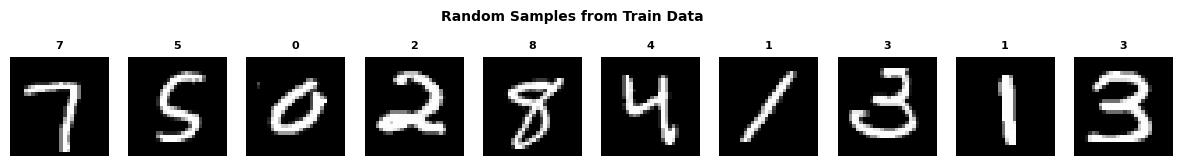

In [325]:
# Importing
import matplotlib.pyplot as plt
import numpy as np

# Create Random Indexes
n = 10
random_idxs = torch.randint(low=0, high=len(train_data), size=(1,n)).squeeze()

# Plotting
plt.figure(figsize=(int(1.5*n),2))
for i, idx in enumerate(random_idxs):
    plt.subplot(1,n,i+1)
    img, label = train_data[idx]
    plt.imshow(img.squeeze(), cmap='gray'); plt.title(label, weight='bold', size=8); plt.axis(False)
plt.suptitle('Random Samples from Train Data', weight='bold', size=10)
print(img.shape)

class_names = train_data.classes


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [326]:
# Creating Train & Test Dataloaders
train_dataloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=32, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [327]:
class MNIST_CNN_Model(nn.Module):
    '''Creates a CNN Model (TinyVGG) for the MNIST dataset. `Hola`'''
    def __init__(self, img_channels: int, hidden_units: int, out_classes: int):

        super().__init__()

        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=img_channels, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=out_classes, kernel_size=3, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.out_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*4*4, out_features=out_classes)
        )

    def forward(self, x):
        return self.out_layer(self.conv_block_2(self.conv_block_1(x)))

        
model_0 = MNIST_CNN_Model(img_channels=1, hidden_units=10, out_classes=len(class_names))
model_1 = MNIST_CNN_Model(img_channels=1, hidden_units=10, out_classes=len(class_names)).to(device)

from torchinfo import summary
print(model_0)
summary(model_0)

MNIST_CNN_Model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)


Layer (type:depth-idx)                   Param #
MNIST_CNN_Model                          --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       100
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      1,610
Total params: 4,440
Trainable params: 4,440
Non-trainable params: 0

'5 - five'

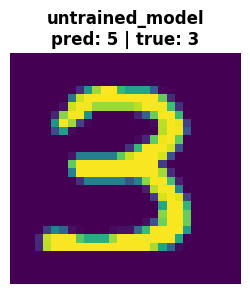

In [328]:
# Forward 1 Image Sample through the Model
model_0.eval()
with torch.inference_mode():
    output = model_0(img.unsqueeze(dim=0))  
probs = torch.softmax(output, dim=1); pred = probs.argmax(dim=1)

# Plot img
plt.figure(figsize=(3,3)); plt.imshow(img.squeeze()); plt.axis(False); plt.title(f'untrained_model\npred: {pred.item()} | true: {label}', weight='bold')
class_names[pred.item()]

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [329]:
# Define Accuracy Fn
from helper_functions import accuracy_fn

In [330]:
from tqdm.auto import tqdm
def train_model(model: nn.Module, train_dataloader: torch.utils.data.DataLoader, test_dataloader: torch.utils.data.DataLoader, 
                criterion: torch.nn, optimizer: torch.optim, epochs: int, device='cpu'):
    
    """### Trains a model \n
    `model` --> The model you'll train.\n
    `train_dataloader` --> Training data in for om DataLoader.\n
    `test_dataloader` --> Testing data in for om DataLoader.\n
    `criterion` --> The model's loss function.\n
    `optimizer` --> The model's optimizer.\n
    `epochs` --> Number of epochs to train.\n
    `device` --> For device agnostic-code. 'cuda' for gpu. Defult: 'cpu'\n"""
    
    model.to(device)
    
    for epoch in tqdm(range(epochs)):

        # Training
        model.train()
        epoch_loss, epoch_acc = 0, 0
        test_epoch_loss, test_epoch_acc = 0, 0

        for batch, (X_train, y_train) in enumerate(train_dataloader):
            X_train, y_train = X_train.to(device), y_train.to(device)

            outputs = model(X_train); #print(f'Outputs shape: {outputs.shape}\n y_train shape: {y_train.shape}')
            probs = torch.softmax(outputs, dim=1); preds = probs.argmax(dim=1)
            loss = criterion(outputs, y_train); epoch_acc += accuracy_fn(y_train, preds)
            epoch_loss += loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch_loss /= len(train_dataloader) 
        epoch_acc  /= len(train_dataloader)

        # Testing
        model.eval()
        with torch.inference_mode():
            for test_batch, (X_test, y_test) in enumerate(test_dataloader):
                test_outputs = model_0(X_test)
                test_probs = torch.softmax(test_outputs, dim=1); test_preds = test_probs.argmax(dim=1)
                test_epoch_loss += criterion(test_outputs, y_test); test_epoch_acc += accuracy_fn(y_test, test_preds)

            test_epoch_loss /= len(test_dataloader)
            test_epoch_acc /= len(test_dataloader)
            
        if (epoch % max(1, epochs // 10) == 0):
            print(f'Epoch: {epoch} | Train_Loss: {epoch_loss:.5f} | Train_Acc: {epoch_acc:.2f}% | Test_Loss: {test_epoch_loss:.5f}| Test_Acc: {test_epoch_acc:.2f}%')
    print(f'Epoch: {epoch} | Train_Loss: {epoch_loss:.5f} | Train_Acc: {epoch_acc:.2f}% | Test_Loss: {test_epoch_loss:.5f}| Test_Acc: {test_epoch_acc:.2f}%')    

                

In [331]:
criterion_0 = nn.CrossEntropyLoss()
optimizer_0 = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

epochs = 3
train_model(model=model_0, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
            criterion=criterion_0, optimizer=optimizer_0, epochs=epochs, device='cpu')

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 | Train_Loss: 0.28773 | Train_Acc: 90.50% | Test_Loss: 0.08039| Test_Acc: 97.34%
Epoch: 1 | Train_Loss: 0.08194 | Train_Acc: 97.44% | Test_Loss: 0.06435| Test_Acc: 97.99%
Epoch: 2 | Train_Loss: 0.06465 | Train_Acc: 98.06% | Test_Loss: 0.05384| Test_Acc: 98.22%
Epoch: 2 | Train_Loss: 0.06465 | Train_Acc: 98.06% | Test_Loss: 0.05384| Test_Acc: 98.22%


In [332]:
criterion_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

epochs = 3
train_model(model=model_1, train_dataloader=train_dataloader, test_dataloader=test_dataloader,
            criterion=criterion_1, optimizer=optimizer_1, epochs=epochs, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 | Train_Loss: 0.26103 | Train_Acc: 91.36% | Test_Loss: 0.05384| Test_Acc: 98.22%
Epoch: 1 | Train_Loss: 0.07355 | Train_Acc: 97.73% | Test_Loss: 0.05384| Test_Acc: 98.22%
Epoch: 2 | Train_Loss: 0.05829 | Train_Acc: 98.19% | Test_Loss: 0.05384| Test_Acc: 98.22%
Epoch: 2 | Train_Loss: 0.05829 | Train_Acc: 98.19% | Test_Loss: 0.05384| Test_Acc: 98.22%


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

Text(0.5, 0.98, "Model's Prediction | True Label")

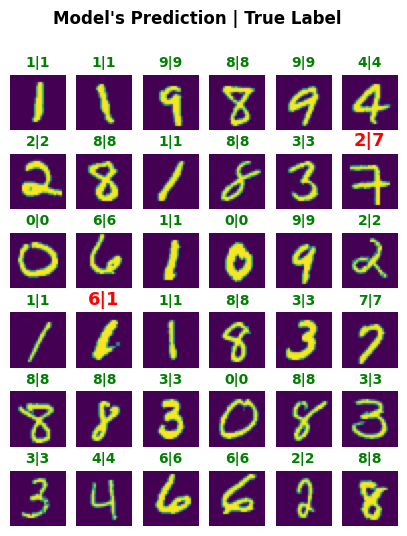

In [374]:
# Define make_predictions()
def make_predictions(model: nn.Module, test_images: list):
    preds = []

    for __ , img in enumerate(test_images): 
        model.eval(); #print(img.shape)
        with torch.inference_mode():
            output = model(img.unsqueeze(dim=0))  
        probs = torch.softmax(output, dim=1); pred = probs.argmax(dim=1)
        preds.append(pred)

    return torch.tensor(preds)

# Random Sampling 16 images in 2 lists X_samples (images) and y_samples (true_preds)
import random
k = 36
random_samples_xy = random.sample(list(test_data), k=k)
X_samples = []; y_samples = []
for X_sample, y_sample in random_samples_xy:
    X_samples.append(X_sample)
    y_samples.append(y_sample)

# Make Predictions
sample_preds = make_predictions(model_0, X_samples)

# Plotting

plt.figure(figsize=(5,6))
for i in range(len(X_samples)):
    plt.subplot(int(np.sqrt(k)), int(np.sqrt(k)), i+1)
    plt.imshow(X_samples[i].squeeze()); plt.axis(False)

    title_text = f'{sample_preds[i]}|{y_samples[i]}'
    if y_samples[i] == sample_preds[i].item():
        plt.title(title_text, c='g', weight= 'bold', size=10)
    else:
        plt.title(title_text, c='r', weight= 'bold', size=13)
plt.suptitle("Model's Prediction | True Label", c='k', weight= 'bold', size=12)





## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:


X, y = test_data.data, test_data.targets
lista_X = []
for i in range(len(test_data)):
    lista_X.append(X[i].unsqueeze(dim=0).to(torch.float32))

full_test_preds = make_predictions(model_0, lista_X)





array([[ 971,    0,    2,    0,    0,    0,    4,    2,    1,    0],
       [   0, 1120,    3,    6,    0,    0,    1,    2,    2,    1],
       [   0,    1, 1012,    4,    0,    0,    1,   11,    3,    0],
       [   0,    0,    2, 1001,    0,    0,    0,    5,    2,    0],
       [   0,    0,    2,    1,  955,    0,    3,    7,    3,   11],
       [   4,    0,    0,   18,    1,  863,    2,    2,    0,    2],
       [   5,    2,    0,    1,    3,    2,  942,    0,    3,    0],
       [   0,    0,    3,    5,    0,    0,    0, 1015,    0,    5],
       [   6,    0,    3,    3,    0,    0,    1,    3,  958,    0],
       [   3,    3,    0,    4,    7,    2,    1,   14,    4,  971]])

Text(0.5, 1.0, 'Confusion Matrix - Model 0')

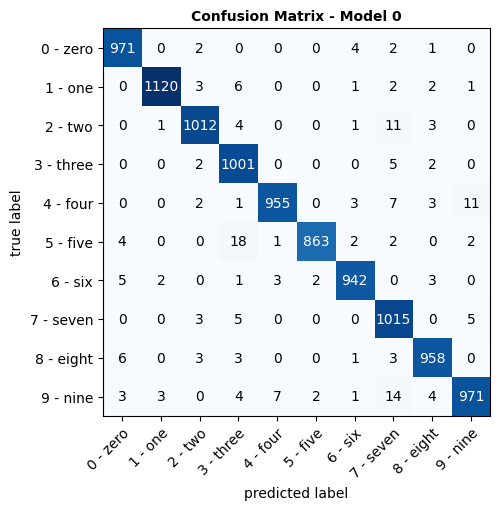

In [ ]:
# 1. Import Libraries
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confiusion instance and compare predictions to targets
class_names_num = range(9)
confmat = ConfusionMatrix(task='multiclass', num_classes=len(class_names))
confmat_tensor = confmat(full_test_preds, y)
plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), figsize=(5,6), class_names=class_names); plt.title('Confusion Matrix - Model 0', weight='bold', size=10)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [444]:
# Solve
A = torch.randn((1, 3, 64, 64))
single_conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=1, padding=0)
print(single_conv_layer(A).shape)
print('As kernel_size goes up, the dimensions of the final images decrease (Min: 1), and when it goes down, the final images dimensions increases (Max:64)')

torch.Size([1, 10, 60, 60])
As kernel_size goes up, the dimensions of the final images decrease (Min: 1), and when it goes down, the final images dimensions increases (Max:64)


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?